Saving news_articles.csv to news_articles (3).csv


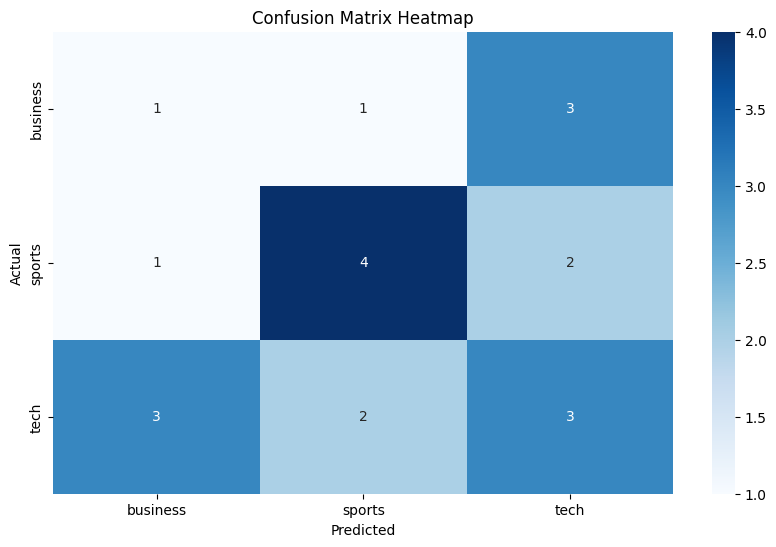

Classification Report:
              precision    recall  f1-score   support

    business       0.20      0.20      0.20         5
      sports       0.57      0.57      0.57         7
        tech       0.38      0.38      0.38         8

    accuracy                           0.40        20
   macro avg       0.38      0.38      0.38        20
weighted avg       0.40      0.40      0.40        20

Accuracy: 0.4


In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (ensure you upload the CSV file to your Google Colab session)
from google.colab import files
uploaded = files.upload()

# Read the uploaded file
file_name = list(uploaded.keys())[0]
news_data = pd.read_csv(file_name)

# Prepare data for classification
features = ['word_count', 'has_keywords', 'read_time']
X = news_data[features]
y = news_data['category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot the confusion matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Print classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=clf.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred))
